# WeatherPy
----

#### Conclusions:
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
### Dependencies and Setup
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Make query URL
query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [3]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
total_cities = [city for city in cities]
total_cities_df = pd.DataFrame(total_cities, columns=["City"])
total_cities_df.head()

,City
0,estacion coahuila
1,auki
2,provideniya
3,russell
4,ushuaia


In [5]:
# Make new column placeholders for the dataframe
total_cities_df["Latitude"] = ""
total_cities_df["Longitude"] = ""
total_cities_df["Temperature"] = ""
total_cities_df["Humidity"] = ""
total_cities_df["Cloudiness"] = ""
total_cities_df["Windspeed"] = ""

In [6]:
total_cities_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed
0,estacion coahuila,,,,,,
1,auki,,,,,,
2,provideniya,,,,,,
3,russell,,,,,,
4,ushuaia,,,,,,


In [7]:
# Iterate through rows of the dataframe
cities_iterated = 0

for index, row in total_cities_df.iterrows():
    specific_city = row["City"]
    query_url = f"{url}appid={api_key}&units={units}&q="
    print(f"Getting results for index {index}: {specific_city}.")
    
    try:
        response = requests.get(query_url + specific_city).json()
        
        lat = response['coord']['lat']
        lon = response['coord']['lon']
        temp = response['main']['temp']
        humidity = response['main']['humidity']
        clouds = response['clouds']['all']
        windspeed = response['wind']['speed']
        
        # Append to dataframe
        total_cities_df.at[index, "Latitude"] = lat
        total_cities_df.at[index, "Longitude"] = lon
        total_cities_df.at[index, "Temperature"] = temp
        total_cities_df.at[index, "Humidity"] = humidity
        total_cities_df.at[index, "Cloudiness"] = clouds
        total_cities_df.at[index, "Windspeed"] = windspeed

        cities_iterated +=1  
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
    
    print("------------")
    
    # Prevent API key timeout from > 60 requests per minute
    if cities_iterated % 59 ==0:
        time.sleep(60)

Getting results for index 0: estacion coahuila.
------------
Getting results for index 1: auki.
------------
Getting results for index 2: provideniya.
------------
Getting results for index 3: russell.
------------
Getting results for index 4: ushuaia.
------------
Getting results for index 5: barrow.
------------
Getting results for index 6: mataura.
------------
Getting results for index 7: erzin.
------------
Getting results for index 8: hobart.
------------
Getting results for index 9: creel.
------------
Getting results for index 10: jamestown.
------------
Getting results for index 11: severo-kurilsk.
------------
Getting results for index 12: guarapari.
------------
Getting results for index 13: south huntington.
------------
Getting results for index 14: sentyabrskiy.
Missing field/result... skipping.
------------
Getting results for index 15: albany.
------------
Getting results for index 16: bajos de haina.
------------
Getting results for index 17: taolanaro.
Missing field/r

------------
Getting results for index 147: champerico.
------------
Getting results for index 148: sechura.
------------
Getting results for index 149: port alfred.
------------
Getting results for index 150: saint-philippe.
------------
Getting results for index 151: poum.
------------
Getting results for index 152: binga.
------------
Getting results for index 153: salzwedel.
------------
Getting results for index 154: haines junction.
------------
Getting results for index 155: camacha.
------------
Getting results for index 156: yingkou.
------------
Getting results for index 157: hovd.
------------
Getting results for index 158: college.
------------
Getting results for index 159: utiroa.
Missing field/result... skipping.
------------
Getting results for index 160: saskylakh.
------------
Getting results for index 161: beyneu.
------------
Getting results for index 162: yulara.
------------
Getting results for index 163: tuktoyaktuk.
------------
Getting results for index 164: to

------------
Getting results for index 296: umm lajj.
------------
Getting results for index 297: katobu.
------------
Getting results for index 298: nguiu.
Missing field/result... skipping.
------------
Getting results for index 299: severo-yeniseyskiy.
------------
Getting results for index 300: maple creek.
------------
Getting results for index 301: vostok.
------------
Getting results for index 302: quimper.
------------
Getting results for index 303: waitati.
------------
Getting results for index 304: sibu.
------------
Getting results for index 305: dunedin.
------------
Getting results for index 306: port hedland.
------------
Getting results for index 307: nazare.
------------
Getting results for index 308: boa vista.
------------
Getting results for index 309: samusu.
Missing field/result... skipping.
------------
Getting results for index 310: kuito.
------------
Getting results for index 311: labuan.
------------
Getting results for index 312: tocopilla.
------------
Getti

------------
Getting results for index 440: yatou.
------------
Getting results for index 441: saint-joseph.
------------
Getting results for index 442: sao miguel do araguaia.
------------
Getting results for index 443: bandarbeyla.
------------
Getting results for index 444: iracoubo.
------------
Getting results for index 445: labuhan.
------------
Getting results for index 446: rivadavia.
------------
Getting results for index 447: uige.
------------
Getting results for index 448: kaman.
------------
Getting results for index 449: tual.
------------
Getting results for index 450: huesca.
------------
Getting results for index 451: rundu.
------------
Getting results for index 452: diffa.
------------
Getting results for index 453: portland.
------------
Getting results for index 454: faya.
------------
Getting results for index 455: gazojak.
------------
Getting results for index 456: xixiang.
------------
Getting results for index 457: alakurtti.
------------
Getting results for i

------------
Getting results for index 585: sabang.
------------
Getting results for index 586: la orilla.
------------
Getting results for index 587: torres.
------------
Getting results for index 588: nyurba.
------------
Getting results for index 589: santa maria.
------------
Getting results for index 590: polazna.
------------
Getting results for index 591: elliot.
------------
Getting results for index 592: katherine.
------------
Getting results for index 593: dongsheng.
------------
Getting results for index 594: loanda.
------------
Getting results for index 595: kakonko.
------------
Getting results for index 596: tawkar.
Missing field/result... skipping.
------------
Getting results for index 597: palu.
------------
Getting results for index 598: tarauaca.
------------
Getting results for index 599: naugarzan.
Missing field/result... skipping.
------------
Getting results for index 600: kahului.
------------
Getting results for index 601: chiredzi.
------------
Getting resul

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Display dataframe
total_cities_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed
0,estacion coahuila,32.19,-115,67.53,30,1,11.41
1,auki,-8.77,160.7,84.27,76,100,22.66
2,provideniya,64.38,-173.3,19.4,92,90,13.42
3,russell,32.35,-85.2,68.45,35,90,11.41
4,ushuaia,-54.8,-68.3,49.23,76,90,4.7


In [9]:
len(total_cities_df)

603

In [10]:
# Export the city data into a .csv
total_cities_df.to_csv("weatherpy_final_data.csv", encoding="utf-8", index=False)

In [11]:
# Convert the datatypes to numbers before plotting data

total_cities_df['Latitude'] = pd.to_numeric(total_cities_df['Latitude'], errors = 'coerce')
total_cities_df['Longitude'] = pd.to_numeric(total_cities_df['Longitude'], errors = 'coerce')
total_cities_df['Temperature'] = pd.to_numeric(total_cities_df['Temperature'], errors = 'coerce')
total_cities_df['Humidity'] = pd.to_numeric(total_cities_df['Humidity'], errors = 'coerce')
total_cities_df['Cloudiness'] = pd.to_numeric(total_cities_df['Cloudiness'], errors = 'coerce')
total_cities_df['Windspeed'] = pd.to_numeric(total_cities_df['Windspeed'], errors = 'coerce')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

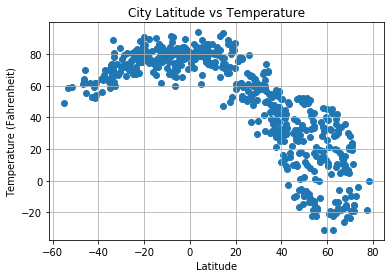

In [12]:
plt.scatter(total_cities_df["Latitude"], total_cities_df["Temperature"], marker = "o")
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Fahrenheit)")
plt.grid(True)

# Save the plt
plt.savefig("LatitudeVsTemperature.png")

plt.show()

#### Latitude vs. Humidity Plot

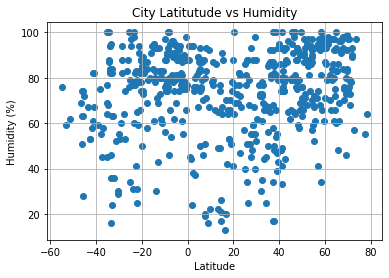

In [13]:
plt.scatter(total_cities_df["Latitude"], total_cities_df["Humidity"], marker = "o")
plt.title("City Latitutude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the plt
plt.savefig("LatitudeVsHumidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

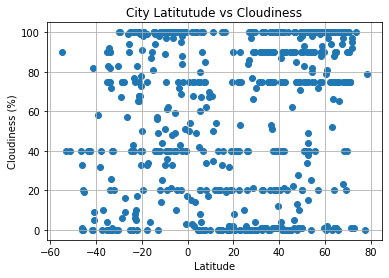

In [14]:
plt.scatter(total_cities_df["Latitude"], total_cities_df["Cloudiness"], marker = "o")
plt.title("City Latitutude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the plt
plt.savefig("LatitudeVsCloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

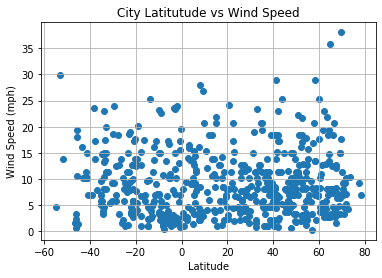

In [15]:
plt.scatter(total_cities_df["Latitude"], total_cities_df["Windspeed"], marker = "o")
plt.title("City Latitutude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the plt
plt.savefig("LatitudeVsWindspeed.png")

plt.show()